# YOLO(You Only Look Once)


#### 객체 감지 (yolov8l.pt, yolov8m.pt, yolov8n.pt, yolov8s.pt, yolov8x.pt, yolov8x6.pt)
#### 분할 (yolov8l-seg.pt, yolov8m-seg.pt, yolov8n-seg.pt, yolov8s-seg.pt, yolov8x-seg.pt)
#### 분류 (yolov8l-cls.pt, yolov8m-cls.pt, yolov8n-cls.pt, yolov8s-cls.pt, yolov8x-cls.pt)

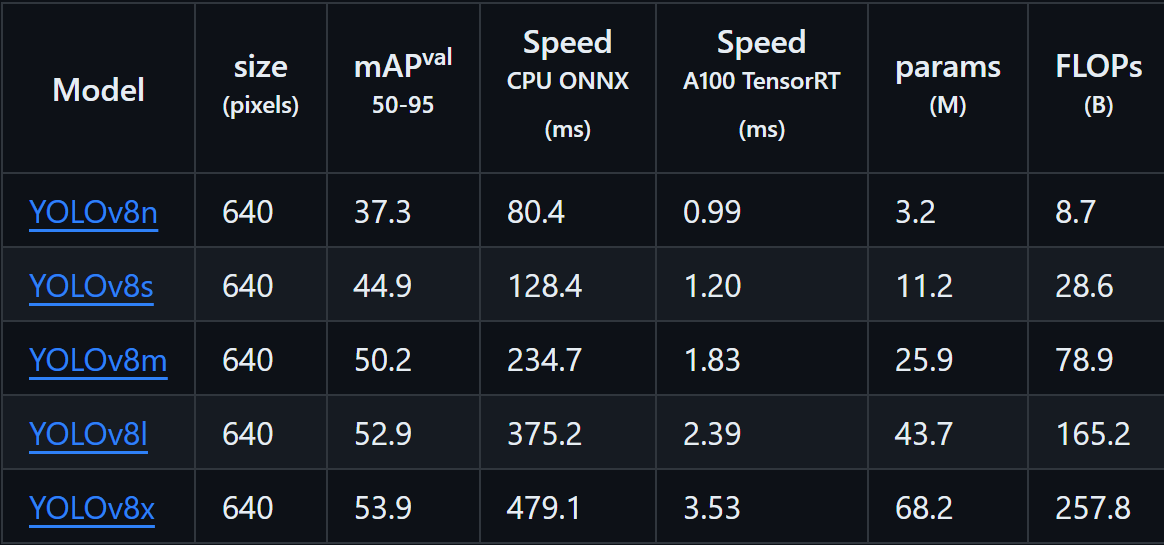

* 'n' 모델 이미지 객체인식에 약 40~50[ms]가 소요 된다.
* 'x' 모델 이미지 객체인식에 약 300~400[ms]가 소요된다.

# CLI 기본 사용법
* yolo predict model=yolov8n.pt source='https://ultralytics.com/images/bus.jpg'

* 이미지에서 객체 탐지
    - yolo predict model=yolov8n.pt source='image.jpg'
* 비디오에서 객체 탐지
    - yolo predict model=yolov8n.pt source='video.mp4'
* 웹캠을 사용하여 실시간 객체 탐지
 - yolo predict model=yolov8n.pt source=0 show=True

1. 여러 이미지 파일을 받아 드라이브에 업로드
2. 모델을 구축
3. 업로드된 이미지 파일 모델 적용

In [1]:
pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 645.9/645.9 kB 10.4 MB/s eta 0:00:00


In [ ]:
from google.colab import files
import os
import shutil

# 파일 업로드
uploaded = files.upload()

# 업로드된 파일이 들어갈 폴더 생성
folder_name = 'upload_images'
os.makedirs(folder_name, exist_ok=True)

# 업로드된 파일을 폴더로 이동
for filename in uploaded.keys():
    src_path = filename
    dest_path = os.path.join(folder_name, filename)
    shutil.move(src_path, dest_path)

# 폴더 안의 파일 목록 출력
print(f'Files moved to folder {folder_name}: {os.listdir(folder_name)}')

Saving 거리.jpg to 거리.jpg
Saving 거실.jpg to 거실.jpg
Saving 교실.jpg to 교실.jpg
Saving 길거리.jpg to 길거리.jpg
Saving 도로.jpg to 도로.jpg
Saving 사무실.jpg to 사무실.jpg
Saving 옷가게.jpg to 옷가게.jpg
Saving 책상.jpg to 책상.jpg
Saving 카페.jpg to 카페.jpg
Files moved to folder upload_images: ['도로.jpg', '교실.jpg', '옷가게.jpg', '길거리.jpg', '거실.jpg', '거리.jpg', '사무실.jpg', '카페.jpg', '책상.jpg']


In [ ]:
# 파일명 변경
# 받아온 파일명을 정리해야 나중에 편할 듯
import os
folder_path = '/content/upload_images'
png_files = [f for f in os.listdir(folder_path) if f.endswith('.jpg')]
png_files.sort()  # 파일을 정렬하여 이름을 순차적으로 변경합니다.
for i, file in enumerate(png_files, start=1):
    # 새 파일명 설정 (image_1.jpg, image_2.jpg, ...)
    new_file_name = f"image_{i}.jpg"
    # 파일 이름 변경
    os.rename(os.path.join(folder_path, file), os.path.join(folder_path, new_file_name))
print("파일 이름 변경 완료!")

파일 이름 변경 완료!


In [2]:
import ultralytics
from ultralytics import YOLO

import warnings
warnings.filterwarnings('ignore')

In [5]:
model_seg = YOLO('yolov8n-seg.yaml').load('yolov8n.pt')
results = model_seg.train(data='coco128-seg.yaml', epochs=10, imgsz=640)


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

train: Scanning /content/datasets/coco128-seg/labels/train2017.cache... 126 images, 2 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/datasets/coco128-seg/labels/train2017.cache... 126 images, 2 backgrounds, 0 corrupt: 100%|██████████| 128/128 [00:00<?, ?it/s]

Plotting labels to runs/segment/train2/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000119, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/segment/train2
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/10         0G      1.204      14.55      1.409      1.214         76        640: 100%|██████████| 8/8 [03:11<00:00, 23.89s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [01:11<00:00, 17.84s/it]

                   all        128        929      0.644      0.526      0.586      0.428      0.089       0.07     0.0468     0.0151



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/10         0G      1.128      12.84      1.346      1.189        101        640: 100%|██████████| 8/8 [03:01<00:00, 22.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [01:11<00:00, 17.99s/it]

                   all        128        929      0.635      0.539      0.593      0.437      0.097     0.0777     0.0486     0.0159



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/10         0G      1.183      11.61      1.442      1.196        106        640: 100%|██████████| 8/8 [02:53<00:00, 21.74s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [01:09<00:00, 17.45s/it]

                   all        128        929      0.678      0.511      0.606      0.441     0.0733     0.0775     0.0492     0.0171



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/10         0G      1.168      9.688      1.371      1.195        101        640: 100%|██████████| 8/8 [02:50<00:00, 21.31s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [01:09<00:00, 17.37s/it]

                   all        128        929      0.663      0.519        0.6      0.442     0.0579     0.0742     0.0437     0.0159



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/10         0G      1.148      8.539      1.414       1.19         52        640: 100%|██████████| 8/8 [02:48<00:00, 21.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [01:10<00:00, 17.70s/it]


                   all        128        929      0.665      0.519      0.601      0.447     0.0621     0.0721     0.0461     0.0157

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/10         0G      1.161      7.785      1.444      1.196         95        640: 100%|██████████| 8/8 [02:44<00:00, 20.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [01:14<00:00, 18.60s/it]

                   all        128        929      0.551      0.569      0.611      0.447     0.0757     0.0927     0.0514     0.0158



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/10         0G      1.161      6.894      1.439      1.204        196        640: 100%|██████████| 8/8 [02:46<00:00, 20.77s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):  50%|█████     | 2/4 [00:50<00:50, 25.37s/it]


KeyboardInterrupt: ignored

In [ ]:
# 모델 검증
metrics = model_seg.val()  # 데이터셋과 설정이 기억되어 있어 인자가 필요 없습니다
metrics.box.map    # map50-95(B)
metrics.box.map50  # map50(B)
metrics.box.map75  # map75(B)
metrics.box.maps   # 각 카테고리별 map50-95(B) 리스트
metrics.seg.map    # map50-95(M)
metrics.seg.map50  # map50(M)
metrics.seg.map75  # map75(M)
metrics.seg.maps   # 각 카테고리별 map50-95(M) 리스트

In [ ]:
from ultralytics import YOLO

# 모델 불러오기
# model = YOLO('yolov8x.yaml')
# model = YOLO('yolov8x.pt')  # 사전 훈련된 모델
model = YOLO('yolov8x.yaml').load('yolov8x.pt')  # 가중치 전송

# 모델 학습
result = model.train(data='coco128.yaml', epochs=100, imgsz=320)
# 1시간 35분

In [ ]:
import torch

# 학습 시킨 모델 가중치 저장
torch.save(model.state_dict(), 'my_yolo_weights.pth')
# 학습 시킨 모델 저장
torch.save(model, 'my_yolo_model.pth')

# # 학습 시킨 모델 저장
# torch.save(model.state_dict(), 'my_yolo_model.pth')
# new_model.load_state_dict(torch.load('my_model.pth'))
# loaded_model = torch.load('my_model.pth')

NameError: ignored

In [ ]:
# 모델 아키텍처 만들기
model = YOLO('yolov8n.yaml')

# 미리 저장한 상태의 모델 불러오기
model.load_state_dict(torch.load('my_yolo_model.pth'))

In [ ]:
yolov8x-cls.pt
yaml 1000개의 클래스
names:

In [ ]:
import yaml

In [ ]:
yaml_names = '''
  0: tench
  1: goldfish
  2: great white shark
  3: tiger shark
  4: hammerhead shark
  5: electric ray
  6: stingray
  7: cock
  8: hen
  9: ostrich
  10: brambling
  11: goldfinch
  12: house finch
  13: junco
  14: indigo bunting
  15: American robin
  16: bulbul
  17: jay
  18: magpie
  19: chickadee
  20: American dipper
  21: kite
  22: bald eagle
  23: vulture
  24: great grey owl
  25: fire salamander
  26: smooth newt
  27: newt
  28: spotted salamander
  29: axolotl
  30: American bullfrog
  31: tree frog
  32: tailed frog
  33: loggerhead sea turtle
  34: leatherback sea turtle
  35: mud turtle
  36: terrapin
  37: box turtle
  38: banded gecko
  39: green iguana
  40: Carolina anole
  41: desert grassland whiptail lizard
  42: agama
  43: frilled-necked lizard
  44: alligator lizard
  45: Gila monster
  46: European green lizard
  47: chameleon
  48: Komodo dragon
  49: Nile crocodile
  50: American alligator
  51: triceratops
  52: worm snake
  53: ring-necked snake
  54: eastern hog-nosed snake
  55: smooth green snake
  56: kingsnake
  57: garter snake
  58: water snake
  59: vine snake
  60: night snake
  61: boa constrictor
  62: African rock python
  63: Indian cobra
  64: green mamba
  65: sea snake
  66: Saharan horned viper
  67: eastern diamondback rattlesnake
  68: sidewinder
  69: trilobite
  70: harvestman
  71: scorpion
  72: yellow garden spider
  73: barn spider
  74: European garden spider
  75: southern black widow
  76: tarantula
  77: wolf spider
  78: tick
  79: centipede
  80: black grouse
  81: ptarmigan
  82: ruffed grouse
  83: prairie grouse
  84: peacock
  85: quail
  86: partridge
  87: grey parrot
  88: macaw
  89: sulphur-crested cockatoo
  90: lorikeet
  91: coucal
  92: bee eater
  93: hornbill
  94: hummingbird
  95: jacamar
  96: toucan
  97: duck
  98: red-breasted merganser
  99: goose
  100: black swan
  101: tusker
  102: echidna
  103: platypus
  104: wallaby
  105: koala
  106: wombat
  107: jellyfish
  108: sea anemone
  109: brain coral
  110: flatworm
  111: nematode
  112: conch
  113: snail
  114: slug
  115: sea slug
  116: chiton
  117: chambered nautilus
  118: Dungeness crab
  119: rock crab
  120: fiddler crab
  121: red king crab
  122: American lobster
  123: spiny lobster
  124: crayfish
  125: hermit crab
  126: isopod
  127: white stork
  128: black stork
  129: spoonbill
  130: flamingo
  131: little blue heron
  132: great egret
  133: bittern
  134: crane (bird)
  135: limpkin
  136: common gallinule
  137: American coot
  138: bustard
  139: ruddy turnstone
  140: dunlin
  141: common redshank
  142: dowitcher
  143: oystercatcher
  144: pelican
  145: king penguin
  146: albatross
  147: grey whale
  148: killer whale
  149: dugong
  150: sea lion
  151: Chihuahua
  152: Japanese Chin
  153: Maltese
  154: Pekingese
  155: Shih Tzu
  156: King Charles Spaniel
  157: Papillon
  158: toy terrier
  159: Rhodesian Ridgeback
  160: Afghan Hound
  161: Basset Hound
  162: Beagle
  163: Bloodhound
  164: Bluetick Coonhound
  165: Black and Tan Coonhound
  166: Treeing Walker Coonhound
  167: English foxhound
  168: Redbone Coonhound
  169: borzoi
  170: Irish Wolfhound
  171: Italian Greyhound
  172: Whippet
  173: Ibizan Hound
  174: Norwegian Elkhound
  175: Otterhound
  176: Saluki
  177: Scottish Deerhound
  178: Weimaraner
  179: Staffordshire Bull Terrier
  180: American Staffordshire Terrier
  181: Bedlington Terrier
  182: Border Terrier
  183: Kerry Blue Terrier
  184: Irish Terrier
  185: Norfolk Terrier
  186: Norwich Terrier
  187: Yorkshire Terrier
  188: Wire Fox Terrier
  189: Lakeland Terrier
  190: Sealyham Terrier
  191: Airedale Terrier
  192: Cairn Terrier
  193: Australian Terrier
  194: Dandie Dinmont Terrier
  195: Boston Terrier
  196: Miniature Schnauzer
  197: Giant Schnauzer
  198: Standard Schnauzer
  199: Scottish Terrier
  200: Tibetan Terrier
  201: Australian Silky Terrier
  202: Soft-coated Wheaten Terrier
  203: West Highland White Terrier
  204: Lhasa Apso
  205: Flat-Coated Retriever
  206: Curly-coated Retriever
  207: Golden Retriever
  208: Labrador Retriever
  209: Chesapeake Bay Retriever
  210: German Shorthaired Pointer
  211: Vizsla
  212: English Setter
  213: Irish Setter
  214: Gordon Setter
  215: Brittany
  216: Clumber Spaniel
  217: English Springer Spaniel
  218: Welsh Springer Spaniel
  219: Cocker Spaniels
  220: Sussex Spaniel
  221: Irish Water Spaniel
  222: Kuvasz
  223: Schipperke
  224: Groenendael
  225: Malinois
  226: Briard
  227: Australian Kelpie
  228: Komondor
  229: Old English Sheepdog
  230: Shetland Sheepdog
  231: collie
  232: Border Collie
  233: Bouvier des Flandres
  234: Rottweiler
  235: German Shepherd Dog
  236: Dobermann
  237: Miniature Pinscher
  238: Greater Swiss Mountain Dog
  239: Bernese Mountain Dog
  240: Appenzeller Sennenhund
  241: Entlebucher Sennenhund
  242: Boxer
  243: Bullmastiff
  244: Tibetan Mastiff
  245: French Bulldog
  246: Great Dane
  247: St. Bernard
  248: husky
  249: Alaskan Malamute
  250: Siberian Husky
  251: Dalmatian
  252: Affenpinscher
  253: Basenji
  254: pug
  255: Leonberger
  256: Newfoundland
  257: Pyrenean Mountain Dog
  258: Samoyed
  259: Pomeranian
  260: Chow Chow
  261: Keeshond
  262: Griffon Bruxellois
  263: Pembroke Welsh Corgi
  264: Cardigan Welsh Corgi
  265: Toy Poodle
  266: Miniature Poodle
  267: Standard Poodle
  268: Mexican hairless dog
  269: grey wolf
  270: Alaskan tundra wolf
  271: red wolf
  272: coyote
  273: dingo
  274: dhole
  275: African wild dog
  276: hyena
  277: red fox
  278: kit fox
  279: Arctic fox
  280: grey fox
  281: tabby cat
  282: tiger cat
  283: Persian cat
  284: Siamese cat
  285: Egyptian Mau
  286: cougar
  287: lynx
  288: leopard
  289: snow leopard
  290: jaguar
  291: lion
  292: tiger
  293: cheetah
  294: brown bear
  295: American black bear
  296: polar bear
  297: sloth bear
  298: mongoose
  299: meerkat
  300: tiger beetle
  301: ladybug
  302: ground beetle
  303: longhorn beetle
  304: leaf beetle
  305: dung beetle
  306: rhinoceros beetle
  307: weevil
  308: fly
  309: bee
  310: ant
  311: grasshopper
  312: cricket
  313: stick insect
  314: cockroach
  315: mantis
  316: cicada
  317: leafhopper
  318: lacewing
  319: dragonfly
  320: damselfly
  321: red admiral
  322: ringlet
  323: monarch butterfly
  324: small white
  325: sulphur butterfly
  326: gossamer-winged butterfly
  327: starfish
  328: sea urchin
  329: sea cucumber
  330: cottontail rabbit
  331: hare
  332: Angora rabbit
  333: hamster
  334: porcupine
  335: fox squirrel
  336: marmot
  337: beaver
  338: guinea pig
  339: common sorrel
  340: zebra
  341: pig
  342: wild boar
  343: warthog
  344: hippopotamus
  345: ox
  346: water buffalo
  347: bison
  348: ram
  349: bighorn sheep
  350: Alpine ibex
  351: hartebeest
  352: impala
  353: gazelle
  354: dromedary
  355: llama
  356: weasel
  357: mink
  358: European polecat
  359: black-footed ferret
  360: otter
  361: skunk
  362: badger
  363: armadillo
  364: three-toed sloth
  365: orangutan
  366: gorilla
  367: chimpanzee
  368: gibbon
  369: siamang
  370: guenon
  371: patas monkey
  372: baboon
  373: macaque
  374: langur
  375: black-and-white colobus
  376: proboscis monkey
  377: marmoset
  378: white-headed capuchin
  379: howler monkey
  380: titi
  381: Geoffroy's spider monkey
  382: common squirrel monkey
  383: ring-tailed lemur
  384: indri
  385: Asian elephant
  386: African bush elephant
  387: red panda
  388: giant panda
  389: snoek
  390: eel
  391: coho salmon
  392: rock beauty
  393: clownfish
  394: sturgeon
  395: garfish
  396: lionfish
  397: pufferfish
  398: abacus
  399: abaya
  400: academic gown
  401: accordion
  402: acoustic guitar
  403: aircraft carrier
  404: airliner
  405: airship
  406: altar
  407: ambulance
  408: amphibious vehicle
  409: analog clock
  410: apiary
  411: apron
  412: waste container
  413: assault rifle
  414: backpack
  415: bakery
  416: balance beam
  417: balloon
  418: ballpoint pen
  419: Band-Aid
  420: banjo
  421: baluster
  422: barbell
  423: barber chair
  424: barbershop
  425: barn
  426: barometer
  427: barrel
  428: wheelbarrow
  429: baseball
  430: basketball
  431: bassinet
  432: bassoon
  433: swimming cap
  434: bath towel
  435: bathtub
  436: station wagon
  437: lighthouse
  438: beaker
  439: military cap
  440: beer bottle
  441: beer glass
  442: bell-cot
  443: bib
  444: tandem bicycle
  445: bikini
  446: ring binder
  447: binoculars
  448: birdhouse
  449: boathouse
  450: bobsleigh
  451: bolo tie
  452: poke bonnet
  453: bookcase
  454: bookstore
  455: bottle cap
  456: bow
  457: bow tie
  458: brass
  459: bra
  460: breakwater
  461: breastplate
  462: broom
  463: bucket
  464: buckle
  465: bulletproof vest
  466: high-speed train
  467: butcher shop
  468: taxicab
  469: cauldron
  470: candle
  471: cannon
  472: canoe
  473: can opener
  474: cardigan
  475: car mirror
  476: carousel
  477: tool kit
  478: carton
  479: car wheel
  480: automated teller machine
  481: cassette
  482: cassette player
  483: castle
  484: catamaran
  485: CD player
  486: cello
  487: mobile phone
  488: chain
  489: chain-link fence
  490: chain mail
  491: chainsaw
  492: chest
  493: chiffonier
  494: chime
  495: china cabinet
  496: Christmas stocking
  497: church
  498: movie theater
  499: cleaver
  500: cliff dwelling
  501: cloak
  502: clogs
  503: cocktail shaker
  504: coffee mug
  505: coffeemaker
  506: coil
  507: combination lock
  508: computer keyboard
  509: confectionery store
  510: container ship
  511: convertible
  512: corkscrew
  513: cornet
  514: cowboy boot
  515: cowboy hat
  516: cradle
  517: crane (machine)
  518: crash helmet
  519: crate
  520: infant bed
  521: Crock Pot
  522: croquet ball
  523: crutch
  524: cuirass
  525: dam
  526: desk
  527: desktop computer
  528: rotary dial telephone
  529: diaper
  530: digital clock
  531: digital watch
  532: dining table
  533: dishcloth
  534: dishwasher
  535: disc brake
  536: dock
  537: dog sled
  538: dome
  539: doormat
  540: drilling rig
  541: drum
  542: drumstick
  543: dumbbell
  544: Dutch oven
  545: electric fan
  546: electric guitar
  547: electric locomotive
  548: entertainment center
  549: envelope
  550: espresso machine
  551: face powder
  552: feather boa
  553: filing cabinet
  554: fireboat
  555: fire engine
  556: fire screen sheet
  557: flagpole
  558: flute
  559: folding chair
  560: football helmet
  561: forklift
  562: fountain
  563: fountain pen
  564: four-poster bed
  565: freight car
  566: French horn
  567: frying pan
  568: fur coat
  569: garbage truck
  570: gas mask
  571: gas pump
  572: goblet
  573: go-kart
  574: golf ball
  575: golf cart
  576: gondola
  577: gong
  578: gown
  579: grand piano
  580: greenhouse
  581: grille
  582: grocery store
  583: guillotine
  584: barrette
  585: hair spray
  586: half-track
  587: hammer
  588: hamper
  589: hair dryer
  590: hand-held computer
  591: handkerchief
  592: hard disk drive
  593: harmonica
  594: harp
  595: harvester
  596: hatchet
  597: holster
  598: home theater
  599: honeycomb
  600: hook
  601: hoop skirt
  602: horizontal bar
  603: horse-drawn vehicle
  604: hourglass
  605: iPod
  606: clothes iron
  607: jack-o'-lantern
  608: jeans
  609: jeep
  610: T-shirt
  611: jigsaw puzzle
  612: pulled rickshaw
  613: joystick
  614: kimono
  615: knee pad
  616: knot
  617: lab coat
  618: ladle
  619: lampshade
  620: laptop computer
  621: lawn mower
  622: lens cap
  623: paper knife
  624: library
  625: lifeboat
  626: lighter
  627: limousine
  628: ocean liner
  629: lipstick
  630: slip-on shoe
  631: lotion
  632: speaker
  633: loupe
  634: sawmill
  635: magnetic compass
  636: mail bag
  637: mailbox
  638: tights
  639: tank suit
  640: manhole cover
  641: maraca
  642: marimba
  643: mask
  644: match
  645: maypole
  646: maze
  647: measuring cup
  648: medicine chest
  649: megalith
  650: microphone
  651: microwave oven
  652: military uniform
  653: milk can
  654: minibus
  655: miniskirt
  656: minivan
  657: missile
  658: mitten
  659: mixing bowl
  660: mobile home
  661: Model T
  662: modem
  663: monastery
  664: monitor
  665: moped
  666: mortar
  667: square academic cap
  668: mosque
  669: mosquito net
  670: scooter
  671: mountain bike
  672: tent
  673: computer mouse
  674: mousetrap
  675: moving van
  676: muzzle
  677: nail
  678: neck brace
  679: necklace
  680: nipple
  681: notebook computer
  682: obelisk
  683: oboe
  684: ocarina
  685: odometer
  686: oil filter
  687: organ
  688: oscilloscope
  689: overskirt
  690: bullock cart
  691: oxygen mask
  692: packet
  693: paddle
  694: paddle wheel
  695: padlock
  696: paintbrush
  697: pajamas
  698: palace
  699: pan flute
  700: paper towel
  701: parachute
  702: parallel bars
  703: park bench
  704: parking meter
  705: passenger car
  706: patio
  707: payphone
  708: pedestal
  709: pencil case
  710: pencil sharpener
  711: perfume
  712: Petri dish
  713: photocopier
  714: plectrum
  715: Pickelhaube
  716: picket fence
  717: pickup truck
  718: pier
  719: piggy bank
  720: pill bottle
  721: pillow
  722: ping-pong ball
  723: pinwheel
  724: pirate ship
  725: pitcher
  726: hand plane
  727: planetarium
  728: plastic bag
  729: plate rack
  730: plow
  731: plunger
  732: Polaroid camera
  733: pole
  734: police van
  735: poncho
  736: billiard table
  737: soda bottle
  738: pot
  739: potter's wheel
  740: power drill
  741: prayer rug
  742: printer
  743: prison
  744: projectile
  745: projector
  746: hockey puck
  747: punching bag
  748: purse
  749: quill
  750: quilt
  751: race car
  752: racket
  753: radiator
  754: radio
  755: radio telescope
  756: rain barrel
  757: recreational vehicle
  758: reel
  759: reflex camera
  760: refrigerator
  761: remote control
  762: restaurant
  763: revolver
  764: rifle
  765: rocking chair
  766: rotisserie
  767: eraser
  768: rugby ball
  769: ruler
  770: running shoe
  771: safe
  772: safety pin
  773: salt shaker
  774: sandal
  775: sarong
  776: saxophone
  777: scabbard
  778: weighing scale
  779: school bus
  780: schooner
  781: scoreboard
  782: CRT screen
  783: screw
  784: screwdriver
  785: seat belt
  786: sewing machine
  787: shield
  788: shoe store
  789: shoji
  790: shopping basket
  791: shopping cart
  792: shovel
  793: shower cap
  794: shower curtain
  795: ski
  796: ski mask
  797: sleeping bag
  798: slide rule
  799: sliding door
  800: slot machine
  801: snorkel
  802: snowmobile
  803: snowplow
  804: soap dispenser
  805: soccer ball
  806: sock
  807: solar thermal collector
  808: sombrero
  809: soup bowl
  810: space bar
  811: space heater
  812: space shuttle
  813: spatula
  814: motorboat
  815: spider web
  816: spindle
  817: sports car
  818: spotlight
  819: stage
  820: steam locomotive
  821: through arch bridge
  822: steel drum
  823: stethoscope
  824: scarf
  825: stone wall
  826: stopwatch
  827: stove
  828: strainer
  829: tram
  830: stretcher
  831: couch
  832: stupa
  833: submarine
  834: suit
  835: sundial
  836: sunglass
  837: sunglasses
  838: sunscreen
  839: suspension bridge
  840: mop
  841: sweatshirt
  842: swimsuit
  843: swing
  844: switch
  845: syringe
  846: table lamp
  847: tank
  848: tape player
  849: teapot
  850: teddy bear
  851: television
  852: tennis ball
  853: thatched roof
  854: front curtain
  855: thimble
  856: threshing machine
  857: throne
  858: tile roof
  859: toaster
  860: tobacco shop
  861: toilet seat
  862: torch
  863: totem pole
  864: tow truck
  865: toy store
  866: tractor
  867: semi-trailer truck
  868: tray
  869: trench coat
  870: tricycle
  871: trimaran
  872: tripod
  873: triumphal arch
  874: trolleybus
  875: trombone
  876: tub
  877: turnstile
  878: typewriter keyboard
  879: umbrella
  880: unicycle
  881: upright piano
  882: vacuum cleaner
  883: vase
  884: vault
  885: velvet
  886: vending machine
  887: vestment
  888: viaduct
  889: violin
  890: volleyball
  891: waffle iron
  892: wall clock
  893: wallet
  894: wardrobe
  895: military aircraft
  896: sink
  897: washing machine
  898: water bottle
  899: water jug
  900: water tower
  901: whiskey jug
  902: whistle
  903: wig
  904: window screen
  905: window shade
  906: Windsor tie
  907: wine bottle
  908: wing
  909: wok
  910: wooden spoon
  911: wool
  912: split-rail fence
  913: shipwreck
  914: yawl
  915: yurt
  916: website
  917: comic book
  918: crossword
  919: traffic sign
  920: traffic light
  921: dust jacket
  922: menu
  923: plate
  924: guacamole
  925: consomme
  926: hot pot
  927: trifle
  928: ice cream
  929: ice pop
  930: baguette
  931: bagel
  932: pretzel
  933: cheeseburger
  934: hot dog
  935: mashed potato
  936: cabbage
  937: broccoli
  938: cauliflower
  939: zucchini
  940: spaghetti squash
  941: acorn squash
  942: butternut squash
  943: cucumber
  944: artichoke
  945: bell pepper
  946: cardoon
  947: mushroom
  948: Granny Smith
  949: strawberry
  950: orange
  951: lemon
  952: fig
  953: pineapple
  954: banana
  955: jackfruit
  956: custard apple
  957: pomegranate
  958: hay
  959: carbonara
  960: chocolate syrup
  961: dough
  962: meatloaf
  963: pizza
  964: pot pie
  965: burrito
  966: red wine
  967: espresso
  968: cup
  969: eggnog
  970: alp
  971: bubble
  972: cliff
  973: coral reef
  974: geyser
  975: lakeshore
  976: promontory
  977: shoal
  978: seashore
  979: valley
  980: volcano
  981: baseball player
  982: bridegroom
  983: scuba diver
  984: rapeseed
  985: daisy
  986: yellow lady's slipper
  987: corn
  988: acorn
  989: rose hip
  990: horse chestnut seed
  991: coral fungus
  992: agaric
  993: gyromitra
  994: stinkhorn mushroom
  995: earth star
  996: hen-of-the-woods
  997: bolete
  998: ear
  999: toilet paper

'''

In [ ]:
class_names = [line.split(":")[1].strip() for line in yaml_names.split("\n") if line.strip()]

with open('Imagenet.yaml', 'w') as yaml_file:
    yaml.dump({'names': class_names}, yaml_file)

print(f"YAML 파일이 생성되었습니다. 클래스 수: {len(class_names)}")

YAML 파일이 생성되었습니다. 클래스 수: 1000


In [ ]:
with open('/content/Imagenet.yaml', 'r') as f:
    imagenet_yaml = yaml.safe_load(f)
    display(imagenet_yaml)

{'names': ['tench',
  'goldfish',
  'great white shark',
  'tiger shark',
  'hammerhead shark',
  'electric ray',
  'stingray',
  'cock',
  'hen',
  'ostrich',
  'brambling',
  'goldfinch',
  'house finch',
  'junco',
  'indigo bunting',
  'American robin',
  'bulbul',
  'jay',
  'magpie',
  'chickadee',
  'American dipper',
  'kite',
  'bald eagle',
  'vulture',
  'great grey owl',
  'fire salamander',
  'smooth newt',
  'newt',
  'spotted salamander',
  'axolotl',
  'American bullfrog',
  'tree frog',
  'tailed frog',
  'loggerhead sea turtle',
  'leatherback sea turtle',
  'mud turtle',
  'terrapin',
  'box turtle',
  'banded gecko',
  'green iguana',
  'Carolina anole',
  'desert grassland whiptail lizard',
  'agama',
  'frilled-necked lizard',
  'alligator lizard',
  'Gila monster',
  'European green lizard',
  'chameleon',
  'Komodo dragon',
  'Nile crocodile',
  'American alligator',
  'triceratops',
  'worm snake',
  'ring-necked snake',
  'eastern hog-nosed snake',
  'smooth g

In [ ]:
!pip install yolov8

NotImplementedError: ignored

In [ ]:
from yolov5.data import datasets
datasets.download('imagenet2017')  # ImageNet 다운로드

ModuleNotFoundError: ignored

In [ ]:
from ultralytics import YOLO

# 모델 불러오기
# model = YOLO('yolov8x.yaml')
# model = YOLO('yolov8x.pt')  # 사전 훈련된 모델
model2 = YOLO('yolov8x-cls.pt').load('yolov8x-cls.pt')  # 가중치 전송


# 다운로드한 ImageNet 데이터셋을 사용하여 모델 학습
results = model2.train(data='mnist160.yaml', epochs=100, imgsz=320)

In [ ]:
# # 학습 시킨 모델 저장
torch.save(model.state_dict(), 'my_yolo_model.pth')

In [ ]:
# pre_trained model 불러오기 or 파인튜닝한 모델 불러오기
# 파인 튜닝까지 시간이 생기면 도전

# 예측 실행
want_images = '/content/upload_images'
results = model.predict(want_images,task = 'detect',save = True)  # 이미지에 대한 예측 실행


image 1/9 /content/upload_images/거리.jpg: 320x256 1 person, 4 cars, 1 clock, 167.9ms
image 2/9 /content/upload_images/거실.jpg: 320x320 2 couchs, 1 bed, 39.4ms
image 3/9 /content/upload_images/교실.jpg: 256x320 (no detections), 117.9ms
image 4/9 /content/upload_images/길거리.jpg: 320x224 1 person, 2 cars, 1 motorcycle, 1 truck, 110.9ms
image 5/9 /content/upload_images/도로.jpg: 256x320 11 persons, 4 cars, 1 bus, 2 trucks, 32.1ms
image 6/9 /content/upload_images/사무실.jpg: 192x320 1 chair, 1 clock, 101.1ms
image 7/9 /content/upload_images/옷가게.jpg: 320x320 2 persons, 1 car, 2 cats, 1 suitcase, 39.6ms
image 8/9 /content/upload_images/책상.jpg: 320x320 2 knifes, 1 clock, 38.1ms
image 9/9 /content/upload_images/카페.jpg: 320x256 5 chairs, 31.2ms
Speed: 1.4ms preprocess, 75.3ms inference, 3.1ms postprocess per image at shape (1, 3, 320, 256)
Results saved to runs/detect/train42


In [ ]:
import os
import shutil

original_dir = f'runs/detect/predict'
output_dir = '/content/output'

# 목적지 디렉토리가 존재하지 않으면 생성
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# 원본 디렉토리의 내용을 목적지 디렉토리로 복사
for item in os.listdir(original_dir):
    s = os.path.join(original_dir, item)
    d = os.path.join(output_dir, item)
    if os.path.isdir(s):
        shutil.copytree(s, d, False, None)
    else:
        shutil.copy2(s, d)
print('output폴더에 저장 완료')

output폴더에 저장 완료


In [ ]:
output_folder = 'output'
os.makedirs(output_folder, exist_ok=True)

# 결과를 텍스트 파일로 저장
for i, img_result in enumerate(results):
    bounding_boxes = img_result.boxes.xyxy

    output_file_path = os.path.join(output_folder, f'result_{i + 1}.txt')
    with open(output_file_path, 'w') as f:
        for obj in bounding_boxes:
            class_index = 0  # 클래스 인덱스가 없으므로 임의의 값으로 설정
            class_label = class_labels[class_index]
            confidence = obj[3]  # 신뢰도는 4번째 요소에 저장되어 있음
            bbox_coordinates = obj[:4]  # 바운딩 박스 좌표는 처음 4개 요소에 저장되어 있음

            # 텍스트 파일에 결과 작성
            f.write(f"Class: {class_label}, Confidence: {confidence:.2f}\n")
            f.write(f"BBox Coordinates: {bbox_coordinates}\n")
            f.write('\n')

print(f"저장 경로 : {output_folder}")

AttributeError: ignored

# 예제 결과물

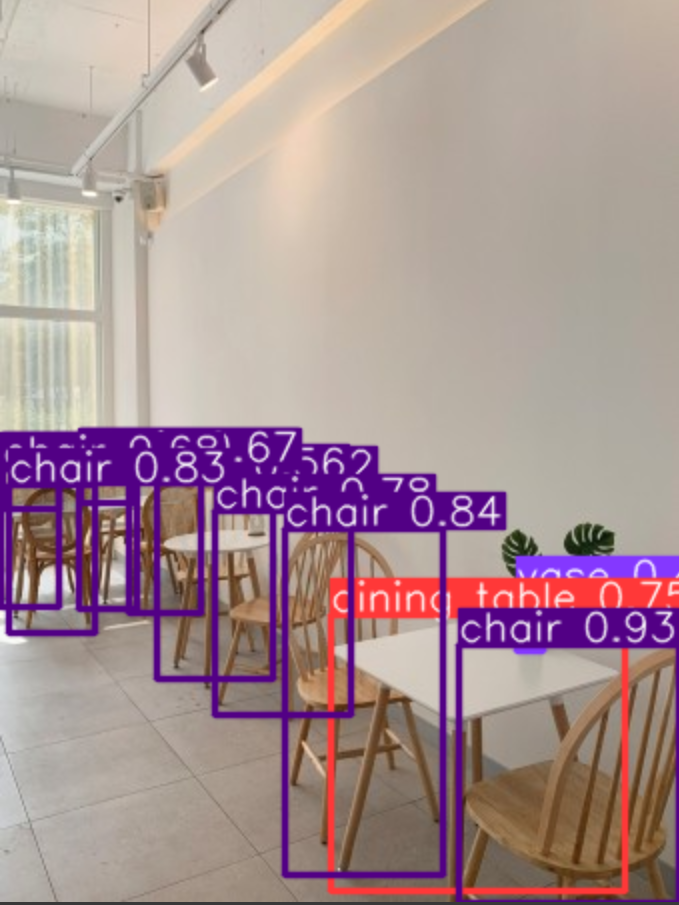

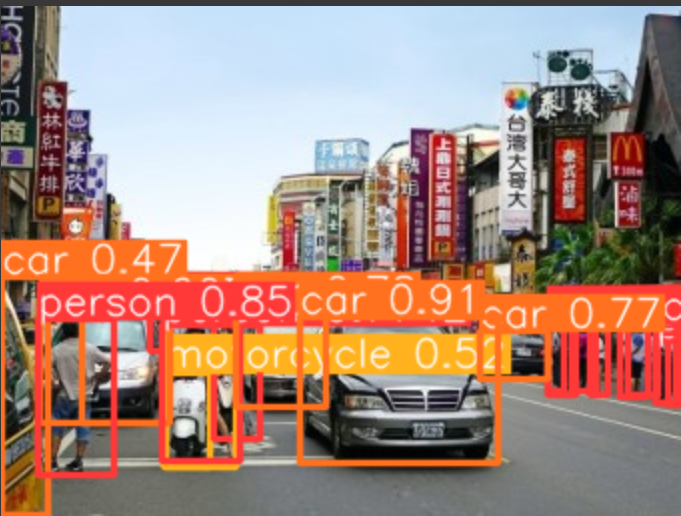

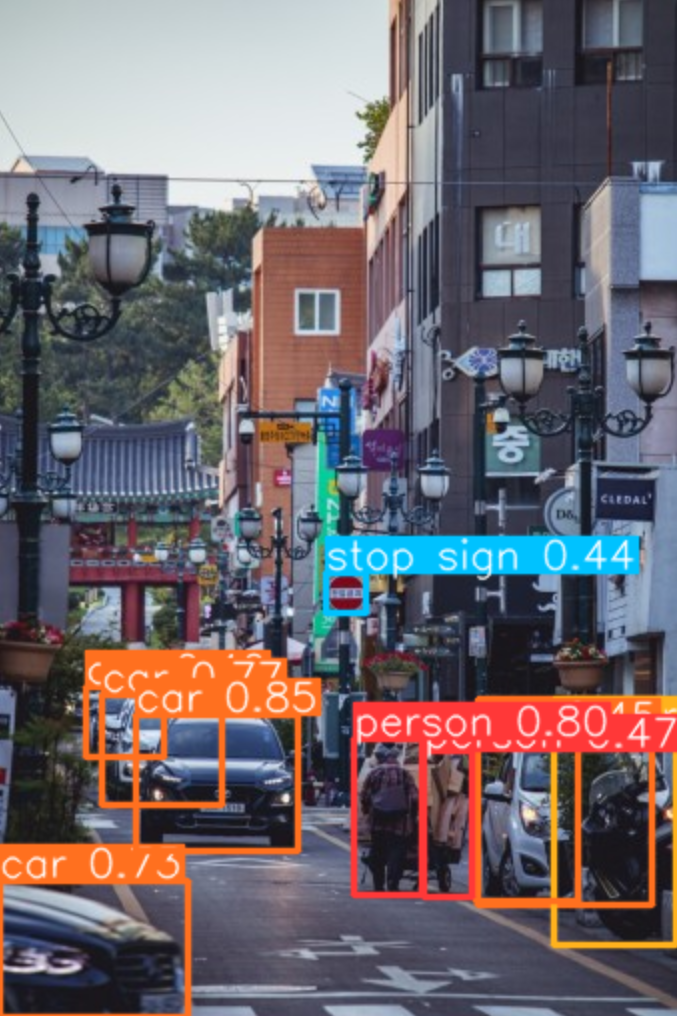

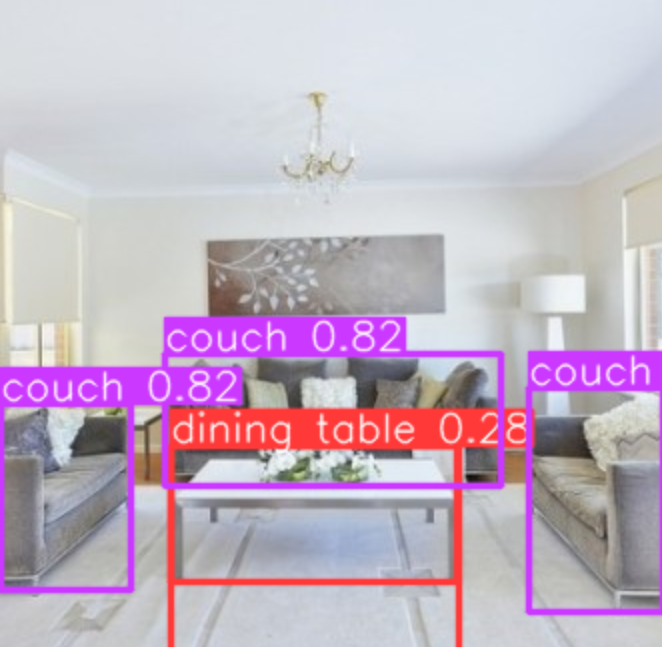

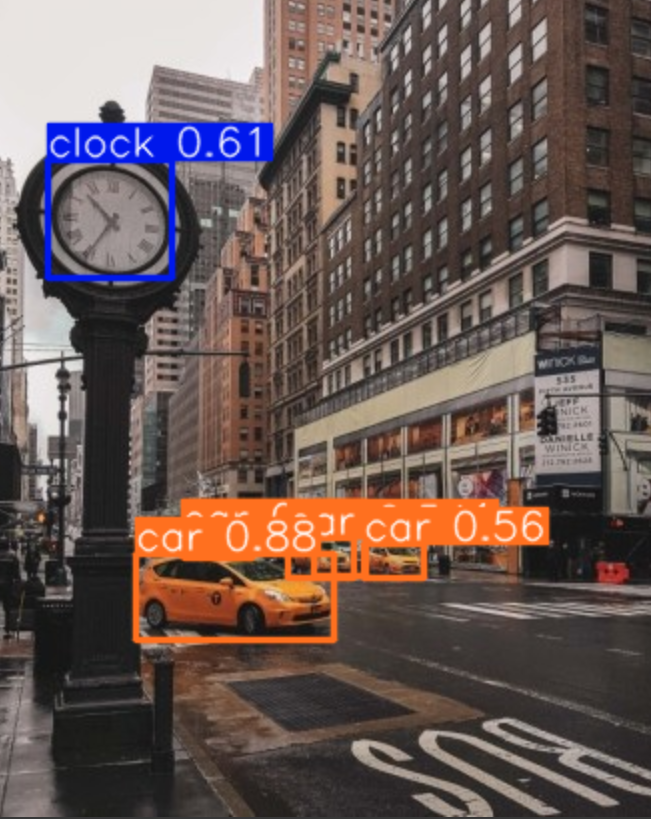

## 이미지받음 -> 여러 이미지 한 폴더에 저장 -> 모델링 -> 결과를 새로운 폴더로 전송

# 부족하다, 수정이 필요하다 생각되는 부분 말씀해 주세요.